# Bayesian inference

Bayesian inference is about fitting a model to data.
What is a model, and what is fitting?

Assume that we have a model that predicts the result of a random experiment.
We describe the model using a probability density function $p(x|\theta)$.
It tells us the probability density of observing $x$ given the parameters $\theta$.
We have seen several examples of this (Bernoulli, Gaussian, Poisson, etc.).

The data are:

$$
x_{1:N} = (x_1,\dots,x_N).
$$

How can we use the data to learn about the parameters $\theta$?

(maximum-likelihood-principle)=
## The maximum likelihood principle

The maximum likelihood principle says that we should choose the parameters $\theta$ that maximize the likelihood of the data.
In other words, we should choose $\theta$ such that the data are most likely to be observed.

The likelihood of a single data point is $p(x_n|\theta)$.
It is the probability (density) of observing $x_n$ given the parameters $\theta$.
The likelihood of the entire dataset $x_{1:N}$ is just the joint probability density of all observations, i.e., $p(x_{1:N}|\theta)$.
Because all observations are independent conditioned on the model parameters $\theta$, we have:

$$
p(x_{1:N}|\theta) = \prod_{n=1}^Np(x_n|\theta).
$$

Now, think of this as a function of $\theta$.
For some values of $\theta$, the likelihood will be high; for some values, it will be low.
The maximum likelihood principle says that we should choose the value of $\theta$ that maximizes the likelihood.
We need to solve the optimization problem:

$$
\theta_{\text{ML}} = \arg\max_\theta p(x_{1:N}|\theta).
$$

Typically, we take the logarithm of the likelihood and maximize that instead.
If you see the maximum likelihood principle for the first time, you may want to look at my undergraduate lecture notes on [this topic](https://purduemechanicalengineering.github.io/me-297-intro-to-data-science/lecture13/intro.html).

## The Bayesian approach

The maximum likelihood gives us a point estimate of the parameters $\theta$.
But how can we pick a single value of $\theta$ when we have limited data?
We should be uncertain about the value of $\theta$.
The Bayesian approach gives us a way to quantify this uncertainty.

The first step is to describe our prior knowledge about the parameters $\theta$:

$$
\theta \sim p(\theta).
$$

We have devoted an entire lecture to this. See [Lecture 11](lecture11). We can use the principle of maximum entropy to specify a prior.

We can describe the situation graphically as:

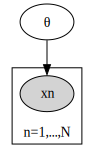

In [1]:
from graphviz import Digraph
gcp = Digraph('coin_toss_bayes_plate')
gcp.node('theta', label='<&theta;>')
with gcp.subgraph(name='cluster_0') as sg:
    sg.node('xn', label='<x<sub>n</sub>>', style='filled')
    sg.attr(label='n=1,...,N')
    sg.attr(labelloc='b')
gcp.edge('theta', 'xn')
gcp.render('coin_toss_bayes_plate', format='png')
gcp

The plot above is a probabilistic graphical model.
It shows the conditional dependencies between the random variables.
The arrows indicate the direction of the dependencies.
The random variables are:

- $\theta$: the parameters of the model
- $x_{1:N}$: the data

We are using the plate notation to indicate that there are $N$ copies of the random variable $x$.
Read more about this notation [here](https://en.wikipedia.org/wiki/Plate_notation).

We are now ready to apply Bayes' rule to find the posterior.
Recall the Bayes' rule for propositions $A$ and $B$:

$$
p(A|B) = \frac{p(AB)}{p(B)}.
$$

We set here:

$$
A = \text{the model parameters are equal to }\theta,
$$

and

$$
B = \text{the data are }x_{1:N}.
$$

We ask, "What is the probability of the model parameters given the data?"
Let's mindlessly follow the rule:

$$
p(\text{the model parameters}|\text{the data}) = \frac{p(\text{the data and the parameters})}{p(\text{the data})}.
$$

This $p(\text{the model parameters}|\text{the data})$ has a particular name.
It is our *posterior state of knowledge* about the model parameters or simply the *posterior*.

We are ready to proceed.
What is the joint probability of the data and the parameters?
Well, we can use the Bayes rule again, but in this form:

$$
p(AB) = p(B|A)p(A).
$$

In our example:

$$
p(\text{the data and the parameters}) = p(\text{the data} | \text{the parameters}) p(\text{the parameters}).
$$

Putting it all together, we get:

$$
\text{posterior} = p(\text{the model parameters}|\text{the data}) = 
\frac{p(\text{the data} | \text{the parameters}) p(\text{the parameters})}{p(\text{the data})}
$$

But we have given unique names to the terms on the right:

$$
p(\text{the data} | \text{the parameters}) = p(x_{1:N}|\theta) = \text{likelihood},
$$

and

$$
p(\text{the parameters}) = p(\theta) = \text{prior}.
$$

So, we can now write the mnemonic (ignoring the normalization constant):

$$
\text{posterior} \propto \text{likelihood}\times\text{prior}.
$$

Tracking back our symbols, this can be written mathematically as:

$$
p(\theta | x_{1:N}) \propto p(x_{1:N}|\theta)p(\theta).
$$

*The posterior is everything a Bayesian has to say about the parameter estimation problem.*